# **Task - 04**
## Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

Sample Dataset :- https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

### Importing necessary libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud

### Downloading NLTK resources:

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

### Loading the dataset:

In [3]:
df = pd.read_csv('/content/twitter_training.csv')

### Displaying first few rows and checking columns:

In [4]:
print(df.head())

   Tweet_ID       entity sentiment  \
0      2401  Borderlands  Positive   
1      2401  Borderlands  Positive   
2      2401  Borderlands  Positive   
3      2401  Borderlands  Positive   
4      2401  Borderlands  Positive   

                                       Tweet_content  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet_ID       74682 non-null  int64 
 1   entity         74682 non-null  object
 2   sentiment      74682 non-null  object
 3   Tweet_content  73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB
None


### Handling missing values in 'Tweet_content':

In [6]:
df['Tweet_content'].fillna('', inplace=True)  # Filling NaN with empty string

## Data Preprocessing

In [7]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

In [8]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(str(text).lower())
    # Removing stopwords and non-alphabetic tokens
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return tokens

In [9]:
df['processed_tweet'] = df['Tweet_content'].apply(preprocess_text)

### Entity-Level Sentiment Analysis:

In [10]:
entity = 'Google'
relevant_tweets = df[df['entity'] == entity]

### Mapping 'Irrelevant' to 'Neutral':

In [11]:
relevant_tweets['sentiment'] = relevant_tweets['sentiment'].replace({'Irrelevant': 'Neutral'})

<ipython-input-11-5c57ed885ad0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  relevant_tweets['sentiment'] = relevant_tweets['sentiment'].replace({'Irrelevant': 'Neutral'})


### Counting sentiment labels:

In [12]:
sentiment_counts = Counter(relevant_tweets['sentiment'])

## Visualization - Pie Chart

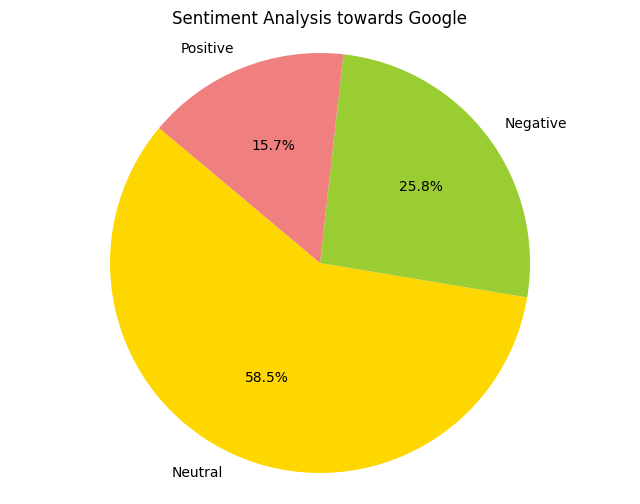

In [13]:
labels = list(sentiment_counts.keys())
sizes = list(sentiment_counts.values())
colors = ['gold', 'yellowgreen', 'lightcoral']
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title(f'Sentiment Analysis towards {entity}')
plt.axis('equal')
plt.show()

## Visualization - Word Cloud for Positive and Negative Sentiments

In [14]:
positive_tweets = relevant_tweets[relevant_tweets['sentiment'] == 'Positive']['processed_tweet'].sum()
negative_tweets = relevant_tweets[relevant_tweets['sentiment'] == 'Negative']['processed_tweet'].sum()

In [15]:
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_tweets))
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_tweets))

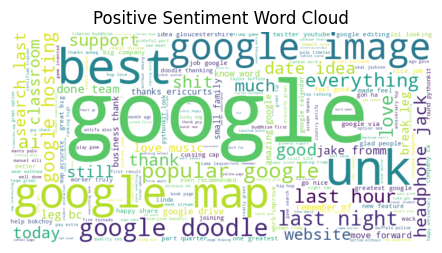

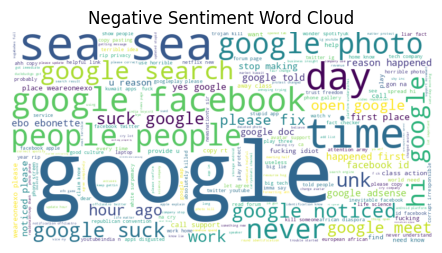

In [16]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Positive Sentiment Word Cloud')
plt.axis('off')
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Negative Sentiment Word Cloud')
plt.axis('off')
plt.show()